In [ ]:
# Importing the required libraries
import numpy as np
np.random.seed(100)
import scipy.stats as scs
import scipy.optimize as sco
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics as st
%matplotlib inline
import pandas as pd
# Installing yfinance
!pip install yfinance --upgrade
import yfinance as yf

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 11.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Question 1

In [ ]:
# Downloading the data for 6 tech companies 
# Assigning it the Adjacent closing prices data to variable d_1
# Portfolio d_1 has the Following Companies 
# Oracle Corparation ---- ORCL
# SAP SE             ---- SAP
# Eaton Corpation    ---- ETN
# Illinois Tool Work ---- ITW
# Nokia              ---- NOK
# Vmware             ---- Vmware
symbols1=['ORCL','SAP','ETN','ITW','NOK','VMW']
numassets1=len(symbols1)
d_1=yf.download(symbols1,start='2010-01-01',end='2019-12-31')
d_1=d_1['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
# Downloading other stocks data for various companies 
# Assigning the data to the variable d_2
# Portfolio d_2 has the Following Companies 
# Bank of America ---- BAC
# Walt Disney Co  ---- DIS
# Coca Cola Co    ---- KO
# MasterCard      ---- MA
# Visa            ---- V
# AT&T            ---- T

symbols2=['KO','MA','T','V','BAC','DIS']
numassets2=len(symbols2)
d_2=yf.download(symbols2,start='2010-01-01',end='2019-12-31')
d_2=d_2['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
# Viewing the first five rows of d_1
d_1.head()


,ETN,ITW,NOK,ORCL,SAP,VMW
Date,,,,,,
2010-01-04,13.332183,36.268211,9.074542,21.112110,39.755566,29.689327
2010-01-05,13.253415,36.171139,9.006567,21.086624,39.510838,30.834106
2010-01-06,13.195379,36.089001,8.938594,20.780775,40.430672,31.120300
2010-01-07,13.390220,36.320477,9.054149,20.712812,41.493973,30.759151
2010-01-08,13.690777,36.663975,9.060946,20.967688,41.806210,30.834106


In [ ]:
# Viewing the first five rows of d_2
d_2.head()


,BAC,DIS,KO,MA,T,V
Date,,,,,,
2010-01-04,13.406423,27.933922,19.496906,24.146004,13.829103,20.213861
2010-01-05,13.842193,27.864237,19.261059,24.074551,13.761357,19.982229
2010-01-06,14.004545,27.716166,19.254219,24.039742,13.559998,19.713898
2010-01-07,14.465950,27.724874,19.206367,23.882648,13.407751,19.897373
2010-01-08,14.337783,27.768427,18.850883,23.891119,13.309521,19.952412


Investigating the characterstics for the 6 tech companies 

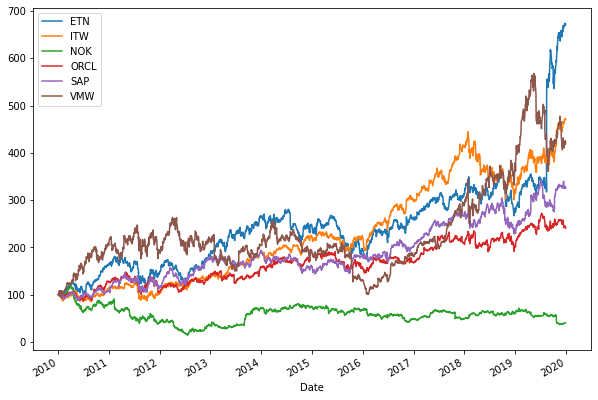

In [ ]:
# Plotting the Adjacent closing prices for tech companies 
# Stock prices for most companies are rising with time except for Nokia which is 
# flacuating around a constant price
(d_1/d_1.iloc[0]*100).plot(figsize=(10,7))

In [ ]:
# Calculating the log returns for the Tech data and displaying the first five rows of the returns
rets1=np.log(d_1/d_1.shift(1));rets1.head()


,ETN,ITW,NOK,ORCL,SAP,VMW
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.005926,-0.002680,-0.007519,-0.001208,-0.006175,0.037834
2010-01-06,-0.004389,-0.002273,-0.007576,-0.014611,0.023014,0.009239
2010-01-07,0.014658,0.006394,0.012845,-0.003276,0.025959,-0.011673
2010-01-08,0.022198,0.009413,0.000751,0.012230,0.007497,0.002434


In [ ]:
# Computing the average returns for the Tech companies 
# There are positive average returns for most of the companies except for nokia which 
# an expected negative return
rets1.mean()*252

ETN     0.191020
ITW     0.155338
NOK    -0.090199
ORCL    0.088043
SAP     0.118201
VMW     0.144123
dtype: float64

In [ ]:
# Computing the covariance matrix for the tech companies 
# The returns for most stocks small flacuation except for Nokia and Vmware which have 
# relatively high volaties 
g=rets1.cov()*252;g

,ETN,ITW,NOK,ORCL,SAP,VMW
ETN,0.091777,0.039641,0.038209,0.031530,0.030093,0.032214
ITW,0.039641,0.045436,0.032008,0.026767,0.024953,0.030731
NOK,0.038209,0.032008,0.180464,0.029568,0.034665,0.034236
ORCL,0.031530,0.026767,0.029568,0.054657,0.030266,0.037196
SAP,0.030093,0.024953,0.034665,0.030266,0.055735,0.032951
VMW,0.032214,0.030731,0.034236,0.037196,0.032951,0.124834


In [ ]:
  # Computing the correlation matrix for the Tech comapnies 
  # The retuns for the Tech companies seems to be all week positive correlation 
  g1=rets1.corr();g1

,ETN,ITW,NOK,ORCL,SAP,VMW
ETN,1.000000,0.613872,0.296895,0.445177,0.420764,0.300960
ITW,0.613872,1.000000,0.353475,0.537119,0.495865,0.408043
NOK,0.296895,0.353475,1.000000,0.297715,0.345641,0.228099
ORCL,0.445177,0.537119,0.297715,1.000000,0.548353,0.450310
SAP,0.420764,0.495865,0.345641,0.548353,1.000000,0.395040
VMW,0.300960,0.408043,0.228099,0.450310,0.395040,1.000000


Investigasting the characterics of stocks in $d_2$




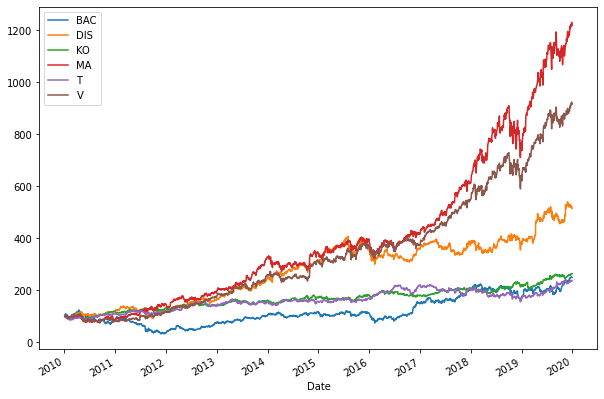

In [ ]:
# Plotting the stock prices for the stocks in d_2
# There is an exponential increase in the prices of MasterCard and Visa Card 
# There also a relative increase for the stocks of the other 4 companies 
(d_2/d_2.iloc[0]*100).plot(figsize=(10,7))

In [ ]:
# Computing the log returns for stocks in d_2 
# Viewing the first five rows of the returns 
rets2=np.log(d_2/d_2.shift(1));rets2.head()


,BAC,DIS,KO,MA,T,V
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.031987,-0.002498,-0.012170,-0.002964,-0.004911,-0.011525
2010-01-06,0.011661,-0.005328,-0.000355,-0.001447,-0.014740,-0.013519
2010-01-07,0.032416,0.000314,-0.002488,-0.006556,-0.011291,0.009264
2010-01-08,-0.008899,0.001570,-0.018682,0.000355,-0.007353,0.002762


In [ ]:
# Computing the average return of the stocks in d_2
# Disney Company, Visa and Mastercard  have  higher expected returns.
rets2.mean()*252

BAC    0.091566
DIS    0.164228
KO     0.097198
MA     0.250642
T      0.086234
V      0.222057
dtype: float64

In [ ]:
# Computing the covariance matrix for returns of stocks in d_2 
# The returns of bank of America have a high volatility compared the other stocks in d_2
rets2.cov()*252

,BAC,DIS,KO,MA,T,V
BAC,0.106332,0.034538,0.014395,0.037729,0.018946,0.033192
DIS,0.034538,0.044302,0.012620,0.024706,0.014668,0.021668
KO,0.014395,0.012620,0.021970,0.013544,0.010037,0.011870
MA,0.037729,0.024706,0.013544,0.063817,0.013915,0.047571
T,0.018946,0.014668,0.010037,0.013915,0.028219,0.011941
V,0.033192,0.021668,0.011870,0.047571,0.011941,0.054785


In [ ]:
# Computing the correlation matrix of returns for companies in d_2
# There is week positive correlation between returns for most companies except for
# Mastercard and Visa  where there is strong positive correlation 
rets2.corr()

,BAC,DIS,KO,MA,T,V
BAC,1.000000,0.503219,0.297821,0.458012,0.345873,0.434884
DIS,0.503219,1.000000,0.404525,0.464645,0.414860,0.439823
KO,0.297821,0.404525,1.000000,0.361712,0.403095,0.342156
MA,0.458012,0.464645,0.361712,1.000000,0.327910,0.804525
T,0.345873,0.414860,0.403095,0.327910,1.000000,0.303704
V,0.434884,0.439823,0.342156,0.804525,0.303704,1.000000


In [ ]:
# Creating a list data set d_1 and d_2
d=[d_1,d_2]
# Creating an empty list
wght=[]
# creating bounds
bnds=tuple((0,1) for wts in range (numassets1))
# Creating a for loop that will iterate the list of data sets created above
for i in d:
  # Defining a function that will minimize the Weights 
  def  func_minimize_weights(wts):
    # The function returns total sum of the porfolio
    return np.sum(i@wts)
  # Defining the constraints for the weights
  # The sum of the weights must equal 1
  # The value of each portfolio should be 100 000
  cons=({'type':'eq','fun':lambda wts:np.sum(wts)-1},{'type':'eq','fun':lambda wts:np.sum(i@wts)-100000})
  # Minimizing the weight  using the SLSQP method with the contraints defined above
  opt=sco.minimize(func_minimize_weights,numassets1*[1./numassets1,],method='SLSQP',bounds=bnds,constraints=cons)
  # Appending the list with the optimized weights
  wght.append(opt['x'])
  # Printing the values of the portfolios 
print('%14s %15f'%('Value of Portfolio 1 =', np.sum(d_1@wght[0])))
print('%14s %15f'%('Value of Portfolio 2 =', np.sum(d_2@wght[1])))


Value of Portfolio 1 =    99999.999997
Value of Portfolio 2 =   100000.000000


In [ ]:
# Printing the optimized weights for portfolio 1 and 2
print('Weights of portfolio 1=',wght[0])
print('Weights of portfolio 2=',wght[1])

Weights of portfolio 1= [0.20543088 0.09425668 0.26500319 0.19894859 0.11204038 0.12432027]
Weights of portfolio 2= [0.24973473 0.11012185 0.21176623 0.06481519 0.23557295 0.12798904]


In [ ]:
# Computing the dot product between the tech data set and the corresponding weights for d_1
portfolio1=d_1@wght[0];portfolio1.head()

Date
2010-01-04    20.907584
2010-01-05    20.974069
2010-01-06    21.014182
2010-01-07    21.167362
2010-01-08    21.358293
dtype: float64

In [ ]:
# Computing the dot product between data set 2 and the corresponding weights for d_2
portfolio2=d_2@wght[1];portfolio2.head()

Date
2010-01-04    17.962914
2010-01-05    17.963886
2010-01-06    17.902642
2010-01-07    17.986132
2010-01-08    17.868094
dtype: float64

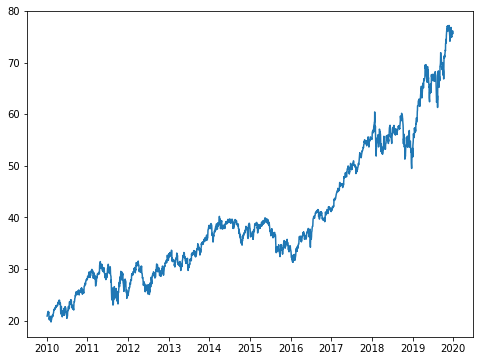

In [ ]:
# Plotting the time series for the portfolio1 with data set d_1
plt.figure(figsize=(8,6));plt.plot(portfolio1.index,portfolio1)

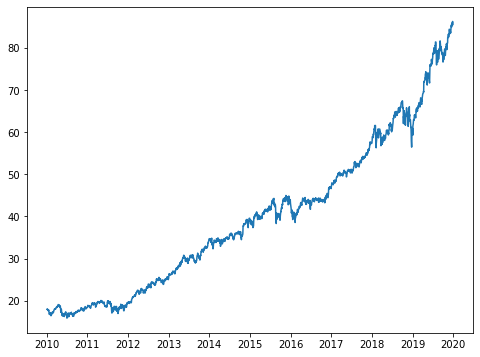

In [ ]:
# Plotting the time series for the portfolio2 with data set d_2
plt.figure(figsize=(8,6));plt.plot(portfolio2.index,portfolio2)

In [ ]:
# Comptuting the dot product of  the returns for d1 and d2 with their respective weights  and viewing
# the first five rows 
rets12=rets1@wght[0];rets22=rets2@wght[1]
rets12.head()

Date
2010-01-04         NaN
2010-01-05    0.000309
2010-01-06   -0.002303
2010-01-07    0.007823
2010-01-08    0.009222
dtype: float64

In [ ]:
# Creating a data frame for the weighted returns and  the first five rows of the data 
data=pd.DataFrame(rets12.values, columns=['Returns1']);data['Returns2']=rets22.values;data.head()

,Returns1,Returns2
0,NaN,NaN
1,0.000309,0.002312
2,-0.002303,-0.003046
3,0.007823,0.005704
4,0.009222,-0.007362


In [ ]:
# Computing the covriance matrix for the weighted returns
data.cov()*252

,Returns1,Returns2
Returns1,0.048467,0.025289
Returns2,0.025289,0.026144


In [ ]:
# The expected returns for portfolio 1 and 2
print('%14s %5f'%('The expected return of portfolio 1 =',np.sum(rets1.mean()*wght[0])*252))
print('%14s %5f'%('The expected return of portfolio 2 =',np.sum(rets2.mean()*wght[1])*252))


The expected return of portfolio 1 = 0.078579
The expected return of portfolio 2 = 0.126516


In [ ]:
# Selecting data from 2010 to 2015 for the tech companies , and viewing the last five rows
d1_2010_2015=d_1.loc['2010-01-01':'2015-12-31'];d1_2010_2015.tail()

,ETN,ITW,NOK,ORCL,SAP,VMW
Date,,,,,,
2015-12-24,26.334711,81.391418,6.175638,33.468498,73.180832,39.086067
2015-12-28,26.008314,81.045547,6.132331,33.269550,73.418533,38.820312
2015-12-29,26.250645,81.976189,6.244930,33.495644,73.967033,38.799870
2015-12-30,26.008314,81.054253,6.166977,33.387108,73.272255,38.861195
2015-12-31,25.736315,80.610641,6.080362,33.034431,72.312355,38.547745


In [ ]:
# Selecting data from 2010 to 2015 for d_2 , and viewing the last five rows
d2_2010_2015=d_2.loc['2010-01-01':'2015-12-31'];d2_2010_2015.tail()

,BAC,DIS,KO,MA,T,V
Date,,,,,,
2015-12-24,15.281431,99.872894,35.556858,94.913673,23.363792,75.074661
2015-12-28,15.157550,101.184288,35.516029,94.855904,23.431202,75.333672
2015-12-29,15.290277,101.023903,35.695702,96.001541,23.545799,75.986000
2015-12-30,15.086761,100.325745,35.581352,95.183220,23.417723,75.161003
2015-12-31,14.892091,99.137024,35.083210,93.729561,23.195274,74.393570


In [ ]:
# Selecting returns data from 2010 to 2015 for the tech companies, and viewing the last five rows
# Assigning the selected data to a new variable 
rets1_2010_2015=rets1.loc['2010-01-01':'2015-12-31'];rets1_2010_2015.tail()

,ETN,ITW,NOK,ORCL,SAP,VMW
Date,,,,,,
2015-12-24,-0.000563,-0.000849,-0.001402,0.002164,0.003003,-0.002438
2015-12-28,-0.012472,-0.004259,-0.007037,-0.005962,0.003243,-0.006822
2015-12-29,0.009274,0.011418,0.018195,0.006773,0.007443,-0.000527
2015-12-30,-0.009274,-0.011310,-0.012561,-0.003246,-0.009437,0.001579
2015-12-31,-0.010513,-0.005488,-0.014145,-0.010619,-0.013187,-0.008099


In [ ]:
# Creating a empty lists of returns and volatilities 
prets=[]
pvols=[]
# Creating a for loop that will iterate 5000 times generating random weights used 
# in the computation of returns and volatilites 
for p in range(5000):
  # generating the random weighs
  wts0=np.random.random(numassets1)
  wts0=wts0/np.sum(wts0)
  # Appending the weighted returns
  prets.append(np.sum(rets1_2010_2015.mean()*wts0)*252)
  # Appending the weighted volatilities
  pvols.append(np.sqrt(wts0.T@(rets1_2010_2015.cov()*252@wts0)))
# Coverting the list of returns and volatilities to arrays
pvols=np.array(pvols)
prets=np.array(prets) 

In [ ]:
# Defining a function stats that computes the the weigheted returns and volatilities
def stats(wts0):
  # A function that calculates the weighted returns
  prets=np.sum(rets1_2010_2015.mean()*wts0)*252
  # A function that calculates the weighted volatilies
  pvols=np.sqrt(wts0.T@(rets1_2010_2015.cov()*252@wts0))
  # A function that computes the sharpe ration
  srs=prets/pvols
  # returning a function that gives an array  with returns , volatility and sharpe ratio
  return np.array([prets,pvols,srs])

In [ ]:
# defining a function to maximize sharpe ratio
def func_to_maximize_sharpe(wts0):
  # returns the sharpe ratio
  return (-stats(wts0)[2])
# A function to minimize variance 
def func_to_minimize_var(wts0):
  # Returns the weighted variance 
  return ((stats(wts0)[1])**2)
# A function to minimize standard deviation
def func_to_minimize_std(wts0):
  # Returns the weighted standard deviation
  return (stats(wts0)[1])

In [ ]:
  # Creating contrains for the optimization of sharpe and variance
  cons=({'type':'eq','fun':lambda x:np.sum(x)-1})
  # creating bounds
  bnds=tuple((0,1) for wts in range (numassets1))

In [ ]:
#  maxmizing the sharpe ratio ,subject to the constraint that sum of the weights is one 
opt_shar=sco.minimize(func_to_maximize_sharpe,numassets1*[1./numassets1,],method='SLSQP',bounds=bnds,constraints=cons)
# minimizing the variance ,subject to the constraint that sum of the weights is one
opt_var=sco.minimize(func_to_minimize_var,numassets1*[1./numassets1,],method='SLSQP',bounds=bnds,constraints=cons)
# Printing the optimized sharpe ratio 
print(opt_shar)

     fun: -0.608990171821985
     jac: array([ 9.12055075e-02, -9.53599811e-05,  8.79061334e-01,  9.60853696e-02,
        5.51529229e-04,  2.97804996e-01])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.10808197e-17, 8.52569419e-01, 7.99856897e-16, 1.75667846e-16,
       1.47430581e-01, 7.77447008e-17])


In [ ]:
# printing the optimzied variance
print(opt_var)

     fun: 0.03973361656306814
     jac: array([0.08394061, 0.07947402, 0.08090354, 0.07947793, 0.07943564,
       0.07968684])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.00000000e+00, 5.07279848e-01, 1.82400819e-18, 2.12897619e-01,
       2.67404870e-01, 1.24176624e-02])


In [ ]:
%%time
# creating array with 50 numbers between 0 and 0.13
trets=np.linspace(0.0,0.13,50)
# Creating an empty list
tvols=[]
# Creating a for loop that iterates the elements created in the array above
# The main goal is to optimize the standard deviation subject to the constraint that
# the standard deviation is eqaul to the value tret from the array and that the sum
# of the weights is one
for tret in trets:
  # Contraints
  cons=({'type':'eq','fun':lambda x:stats(x)[0]-tret},
        {'type':'eq','fun':lambda x :np.sum(x)-1})
  # Optimization function to minimize standard deviation
  res=sco.minimize(func_to_minimize_std,numassets1*[1./numassets1,],method='SLSQP',
                   bounds=bnds,constraints=cons)
  # Appendind the optimized standard deviations
  tvols.append(res['fun'])
# converting the list to an array
tvols=np.array(tvols)

CPU times: user 16.1 s, sys: 38.9 ms, total: 16.1 s
Wall time: 21.2 s


In [ ]:
ind=np.argmin(tvols)
evols=tvols[ind:]
erets=trets[ind:]

In [ ]:
# Computing the slope
r0=.02
slopes=(erets-r0)/evols


In [ ]:
def cml(x,slope_max,r0):
  return r0+slope_max*x
sgpts=np.linspace(0,0.4,100)

In [ ]:
# The intersection of the of the hyperbola and the risk free line
print((erets[np.argmax(slopes)],evols[np.argmax(slopes)]))

(0.13, 0.21403278912112517)


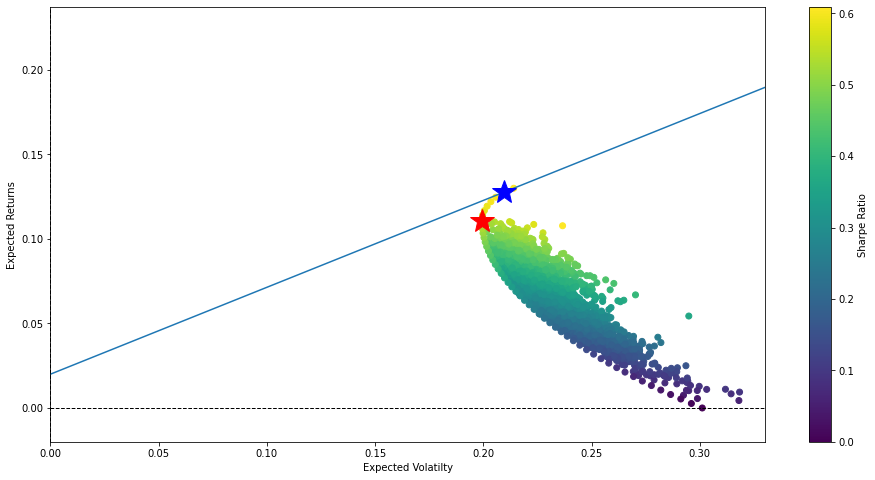

In [ ]:
# Plotting the Frontiers and capital line of the first portfolio
plt.figure(figsize=(16,8))
# plotting the scatter plot for optimized volatilities, returns and the sharpe ratio
plt.scatter(pvols,prets,c=prets-0.02/pvols,marker='o')
# Plotting the hyperbola or the frontier
plt.scatter(tvols,trets,c=trets/tvols,marker='o')
# Plotting Capital market lines 
plt.plot(sgpts,cml(sgpts,slopes[np.argmax(slopes)],0.02))
# Plotting the blue star for the point where the sharpe ratio is optimum
plt.plot(stats(opt_shar['x'])[1],stats(opt_shar['x'])[0],'b*',markersize=25)
# Plotting the Red star for the point where the Variance is optimum
plt.plot(stats(opt_var['x'])[1],stats(opt_var['x'])[0],'r*',markersize=25)
plt.grid='true'
plt.xlim(0.0,0.33)
plt.xlabel('Expected Volatilty')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharpe Ratio')
plt.axhline(0,color='k',ls='--',lw=1.0)
plt.axvline(0,color='k',ls='--',lw=1.0)

The Comments for the plotting the frontier and capital lines are similar to the one given for portfolio 1

In [ ]:
d2_2010_2015=d_2.loc['2010-01-01':'2015-12-31'];d2_2010_2015.tail()

,BAC,DIS,KO,MA,T,V
Date,,,,,,
2015-12-24,15.281431,99.872894,35.556858,94.913673,23.363792,75.074661
2015-12-28,15.157550,101.184288,35.516029,94.855904,23.431202,75.333672
2015-12-29,15.290277,101.023903,35.695702,96.001541,23.545799,75.986000
2015-12-30,15.086761,100.325745,35.581352,95.183220,23.417723,75.161003
2015-12-31,14.892091,99.137024,35.083210,93.729561,23.195274,74.393570


In [ ]:
# Selecting returns  data from 2010 to 2015 for the tech companies, and viewing the last five rows
# Assinging the selected data to a new variable
rets2_2010_2015=rets2.loc['2010-01-01':'2015-12-31'];rets2_2010_2015.tail()

,BAC,DIS,KO,MA,T,V
Date,,,,,,
2015-12-24,-0.004045,0.002838,-0.002981,-0.001419,-0.003456,-0.003826
2015-12-28,-0.008140,0.013045,-0.001149,-0.000609,0.002881,0.003444
2015-12-29,0.008718,-0.001586,0.005046,0.012005,0.004879,0.008622
2015-12-30,-0.013400,-0.006935,-0.003209,-0.008561,-0.005454,-0.010917
2015-12-31,-0.012987,-0.011919,-0.014099,-0.015390,-0.009545,-0.010263


In [ ]:
prets1=[]
pvols1=[]
for p1 in range(5000):
  wts1=np.random.random(numassets2)
  wts1=wts1/np.sum(wts1)
  prets1.append(np.sum(rets2_2010_2015.mean()*wts1)*252)
  pvols1.append(np.sqrt(wts1.T@(rets2_2010_2015.cov()*252@wts1)))
pvols1=np.array(pvols1)
prets1=np.array(prets1) 
pvols1

array([0.17724067, 0.20602044, 0.16501079, ..., 0.15652709, 0.1912879 ,
       0.1900964 ])

In [ ]:
wts1=np.random.random(numassets2)
wts1=wts1/np.sum(wts1)

In [ ]:

def stats1(wts1):
  prets1=np.sum(rets2_2010_2015.mean()*wts1)*252
  pvols1=np.sqrt(wts1.T@(rets2_2010_2015.cov()*252@wts1))
  srs1=prets1/pvols1
  return np.array([prets1,pvols1,srs1])

In [ ]:

def func_to_maximize_sharpe1(wts1):
  return (-stats1(wts1)[2])
def func_to_minimize_var1(wts1):
  return ((stats1(wts1)[1])**2)
def func_to_minimize_std1(wts1):
  return (stats1(wts1)[1])

In [ ]:
  cons1=({'type':'eq','fun':lambda x:np.sum(x)-1})
  bnds1=tuple((0,1) for wts1 in range (numassets2))

In [ ]:
opt_shar1=sco.minimize(func_to_maximize_sharpe1,numassets2*[1./numassets2,],method='SLSQP',bounds=bnds1,constraints=cons1)
opt_var1=sco.minimize(func_to_minimize_var1,numassets1*[2./numassets2,],method='SLSQP',bounds=bnds1,constraints=cons1)
print(opt_shar1)

     fun: -1.0702116604445588
     jac: array([ 1.15681314e+00,  3.17990780e-05, -3.55750322e-04, -5.23030758e-05,
        2.85522044e-02,  1.49309635e-04])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([7.79017683e-18, 4.86870387e-01, 1.47643677e-01, 8.68835194e-02,
       0.00000000e+00, 2.78602417e-01])


In [ ]:
print(opt_var1)

     fun: 0.017469561891658783
     jac: array([0.04694863, 0.03492338, 0.03491472, 0.03926763, 0.03496737,
       0.0349196 ])
 message: 'Optimization terminated successfully.'
    nfev: 88
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.00000000e+00, 5.67187891e-03, 4.82839899e-01, 5.49227395e-18,
       4.57526237e-01, 5.39619850e-02])


In [ ]:
%%time
trets1=np.linspace(0.0,0.2,50)
tvols1=[]
for tret1 in trets1:
  cons1=({'type':'eq','fun':lambda x:stats1(x)[0]-tret1},
        {'type':'eq','fun':lambda x :np.sum(x)-1})
  res1=sco.minimize(func_to_minimize_std1,numassets2*[1./numassets2,],method='SLSQP',
                   bounds=bnds,constraints=cons1)
  tvols1.append(res1['fun'])
tvols1=np.array(tvols1)

CPU times: user 19.3 s, sys: 63.9 ms, total: 19.4 s
Wall time: 21.4 s


In [ ]:
ind1=np.argmin(tvols1)
evols1=tvols1[ind:]
erets1=trets1[ind:]

In [ ]:
r0=.02
slopes1=(erets1-r0)/evols1


In [ ]:
def cml1(x,slope_max,r0):
  return r0+slope_max*x
sgpts1=np.linspace(0,0.4,100)

In [ ]:
print((erets1[np.argmax(slopes1)],evols1[np.argmax(slopes1)]))

(0.2, 0.18689947934945025)


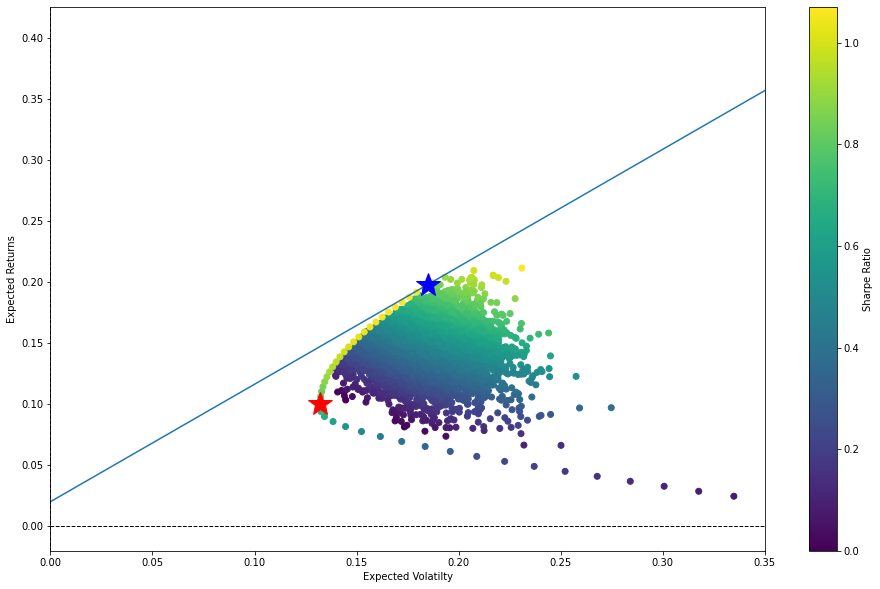

In [ ]:
plt.figure(figsize=(16,10))
plt.scatter(pvols1,prets1,c=prets1-0.02/pvols1,marker='o')
plt.scatter(tvols1,trets1,c=trets1/tvols1,marker='o')
plt.plot(sgpts,cml(sgpts1,slopes1[np.argmax(slopes1)],0.02))
plt.plot(stats1(opt_shar1['x'])[1],stats1(opt_shar1['x'])[0],'b*',markersize=25)
plt.plot(stats1(opt_var1['x'])[1],stats1(opt_var1['x'])[0],'r*',markersize=25)
plt.grid='true'
plt.xlim(0.0,0.35)
plt.xlabel('Expected Volatilty')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharpe Ratio')
plt.axhline(0,color='k',ls='--',lw=1.0)
plt.axvline(0,color='k',ls='--',lw=1.0)

In [ ]:
# Downloading the closing prices for the various assets for the portfolio 3
symbols3=['KO','MA','T','^IRX','GLD','^FVX']
numassets2=len(symbols3)
d2_2016_2019=yf.download(symbols3,start='2016-01-01',end='2019-12-31')
d2_2016_2019=d2_2016_2019['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
# Selecting data from d1 from 2016 to 2019 and assigning the values to portfolio 4
d1_2016_2019=d_1.loc['2016-01-01':'2019-12-31'];d1_2016_2019.tail()

,ETN,ITW,NOK,ORCL,SAP,VMW
Date,,,,,,
2019-12-23,89.831558,171.867249,3.64,51.788067,129.643295,125.238655
2019-12-24,89.217773,171.022400,3.63,51.527725,129.478546,123.877014
2019-12-26,89.746574,172.066528,3.62,51.653069,130.428299,125.878479
2019-12-27,89.699364,171.924210,3.63,51.547009,130.815948,126.452660
2019-12-30,89.642700,171.780914,3.69,50.814205,129.275009,125.033585


In [ ]:
# Displaying the last five rows of portfolio 3
d2_2016_2019.tail()

,GLD,KO,MA,T,^FVX,^IRX
Date,,,,,,
2019-12-23,139.949997,51.079441,293.847015,32.714771,1.754,1.520
2019-12-24,141.270004,50.893394,294.054626,32.622669,1.724,1.538
2019-12-26,142.380005,51.181770,295.754791,32.790131,1.725,1.535
2019-12-27,142.330002,51.488750,297.277039,32.857117,1.678,1.518
2019-12-30,142.630005,51.414330,294.291809,32.689651,1.681,1.490


In [ ]:
# Computing the returns for portfolio 4 and displaying the first five rows 
ret_portfolio1_16= np.log(d1_2016_2019/d1_2016_2019.shift(1));ret_portfolio1_16.head()

,ETN,ITW,NOK,ORCL,SAP,VMW
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.007111,-0.014713,-0.004187,-0.003082,-0.002206,0.012708
2016-01-06,-0.018099,-0.024938,-0.009838,0.005038,0.008796,-0.031534
2016-01-07,-0.023647,-0.032398,0.008439,-0.022016,-0.005682,-0.013301
2016-01-08,-0.011325,-0.008415,0.026263,-0.011192,-0.004023,-0.007733


In [ ]:
# Computing the returns for portfolio 3 and displaying the first five rows 
ret_portfolio2_16= np.log(d2_2016_2019/d2_2016_2019.shift(1));ret_portfolio2_16.head()

,GLD,KO,MA,T,^FVX,^IRX
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.002815,0.003531,0.001897,0.006963,-0.006360,0.279585
2016-01-06,0.014337,-0.005420,-0.015413,-0.001467,-0.043872,0.000000
2016-01-07,0.014041,-0.016679,-0.018488,-0.016280,-0.023300,-0.075986
2016-01-08,-0.004438,-0.002647,-0.019281,0.000895,-0.021317,0.000000


In [ ]:
# Computing the optimized weights for portfolio 4
# code comments are similar to the one given in question 2
d2=[d1_2016_2019,d2_2016_2019]
wght=[]
bnds=tuple((0,1) for wts in range (numassets1))
for i in d2:
  def  func_minimize_weights(wts):
    return np.sum(i@wts)
  cons=({'type':'eq','fun':lambda wts:np.sum(wts)-1},{'type':'eq','fun':lambda wts:np.sum(i@wts)-100000})
  opt=sco.minimize(func_minimize_weights,numassets1*[1./numassets1,],method='SLSQP',bounds=bnds,constraints=cons)
  wght.append(opt['x'].round(5))
print('%14s %15f'%('Value of Portfolio 1 =', np.sum(d1_2016_2019@wght[0])))
print('%14s %15f'%('Value of Portfolio 2 =', np.sum(d2_2016_2019@wght[1])))


Value of Portfolio 1 =    99999.840996
Value of Portfolio 2 =    99999.671073


In [ ]:
# Viewing the optimized weights
print('Weights of portfolio 1=',wght[0].round(8))
print('Weights of portfolio 2=',wght[1])

Weights of portfolio 1= [0.05634 0.37899 0.      0.06113 0.27727 0.22627]
Weights of portfolio 2= [0.27585 0.13296 0.34827 0.11051 0.0668  0.06561]


In [ ]:
# Computing the variance and standard deviation of portfolio  3
var=wght[0].T@(ret_portfolio1_16.cov()*252@wght[0]);std=np.sqrt(var); std  # variance  

0.17461421737316443

In [ ]:
# Computing the variance  and standard deviation of portfolio 4 
var1=wght[1].T@(ret_portfolio2_16.cov()*252@wght[1]); std1=np.sqrt(var1); std1 # variance  

0.10475324702649548

In [ ]:
d1_2016=d1_2016_2019.loc['2016-01-01':'2016-12-31'];d1_2016.tail()


,ETN,ITW,NOK,ORCL,SAP,VMW
Date,,,,,,
2016-12-23,35.040260,110.398338,4.456474,35.612419,79.669800,54.595116
2016-12-27,35.158318,110.716698,4.483871,35.649143,79.772072,54.656437
2016-12-28,34.752785,109.010063,4.383418,35.520596,79.660492,54.152187
2016-12-29,34.706596,108.876732,4.410813,35.529778,80.432182,53.906879
2016-12-30,34.439648,108.850067,4.392550,35.309376,80.357803,53.647942


In [ ]:
d1_2017=d1_2016_2019.loc['2017-01-01':'2017-12-31'];d1_2017.tail()

,ETN,ITW,NOK,ORCL,SAP,VMW
Date,,,,,,
2017-12-22,41.063461,150.766678,4.495671,44.189068,106.035919,87.010109
2017-12-26,40.962811,150.739639,4.495671,44.254379,105.828697,86.921524
2017-12-27,41.015778,150.766678,4.448645,44.207737,106.525688,86.512672
2017-12-28,41.407825,151.092972,4.429834,44.338352,105.866371,86.274170
2017-12-29,41.858139,151.219833,4.382808,44.114426,105.828697,85.395142


In [ ]:
d1_2018=d1_2016_2019.loc['2018-01-01':'2018-12-31'];d1_2018.tail()

,ETN,ITW,NOK,ORCL,SAP,VMW
Date,,,,,,
2018-12-24,35.570320,109.720383,5.376363,40.472202,90.847565,98.505608
2018-12-26,37.177185,114.000351,5.444914,42.273495,94.079819,104.168175
2018-12-27,37.692692,116.168022,5.513465,42.633762,94.663162,105.142601
2018-12-28,37.423965,115.963448,5.689739,42.491550,94.863976,107.922791
2018-12-31,37.654316,117.795151,5.699533,42.804398,95.198685,112.483482


In [ ]:
d1_2019=d1_2016_2019.loc['2019-01-01':'2019-12-31'];d1_2019.tail()


,ETN,ITW,NOK,ORCL,SAP,VMW
Date,,,,,,
2019-12-23,89.831558,171.867249,3.64,51.788067,129.643295,125.238655
2019-12-24,89.217773,171.022400,3.63,51.527725,129.478546,123.877014
2019-12-26,89.746574,172.066528,3.62,51.653069,130.428299,125.878479
2019-12-27,89.699364,171.924210,3.63,51.547009,130.815948,126.452660
2019-12-30,89.642700,171.780914,3.69,50.814205,129.275009,125.033585
